# inicializacao

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
import scipy.signal as signal
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *
from methods.utils.utilities import *
import plotly.express as px

# Estrutura
$ \left(\dfrac{J}{r^2} + m\right)\"s+m\"\alpha(h+r)+\"\alpha\dfrac{J}{r}-mgsin(\alpha)-m\.\alpha^2s = 0$

## Definições

In [2]:
J = 4.948e-6   #kgm²
R = 0.0132  #m
m = 0.071   #kg
g = 9.81    #m/s^2
r = 0.0118  #m
h = 0.035   #m

fb = 0.0362 #N*d/m
vt = 0.008  #m/s
a0 = -0.16  #deg

a = (J/(r**2) + m)

a1 = - m * (h+r) / a
a2 = -(J/r) / a
a3 = m * g / a
a4 = m / a

print(J, 4.948*10**(-6), h)

4.948e-06 4.948e-06 0.035


## Simulação

### entrada 1

In [ ]:
dt = 0.1
size = 100
t = np.arange(0, size, dt)
div = 2.5

fg = np.array([
    [0, 0, 4],[-2, 2, 4],[5, 5, 4],[1, 2, 4],[-2, 8, 4],[4, 5, 4],[-1, 2, 4],[-1.5, 8, 4],[5, 5, 4],[-5, 5, 4],
    [0, 5, 4],[10, 5, 4],[2, 2, 4],[-19, 4, 4],[25, 2, 4],[0, 1, 4],[-35, 1, 5],[-20, 1, 4],[12, 1, 4],[0, 1, 4],
    [-4, 2, 6],[6, 2, 8],[-10, 2, 8],[10, 3, 3],[-1, 2, 2],[4, 2, 2],[-5, 3, 5],[4, 4, 4],[-1, 3, 8],[1, 3, 6],[-6, 2, 6]
])
fg[:, 0] = -fg[:, 0]
re = int(size//div)
u = np.ones(re) 
intev = np.ones(re) * div
u[:fg.shape[0]] = fg[:, 0]
mag = u * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

vel = np.ones(re)
vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*(t - delay)))
    

plt.figure(figsize=(14, 4))
plt.hlines(0, 0, size, colors=["red"])
plt.plot(t, stairs_array)
plt.grid()
plt.show()

ndt = 0.01
tn = np.arange(0, size/10, ndt)

u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(tn.shape)
ds = np.zeros(tn.shape)
d2s = np.zeros(tn.shape)

for i in range(1, t.shape[0]):
    d2s[i] = a1 * d2u[i-1] + a2 * d2u[i-1] + a3 * np.sin(u[i]) + a4 * du[i-1]**2 * s[i-1]
    ds[i] = ds[i-1] + d2s[i] * 0.1
    s[i] = np.clip(s[i-1] + ds[i] * 0.1, -10, 10)

plt.figure(figsize=(14, 4))
plt.plot(t, s*0.1)
plt.grid()
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(tn, ds)
plt.grid()
plt.show()
plt.figure(figsize=(14, 4))
plt.plot(tn, stairs_array / (np.pi / 180))
plt.plot(tn, d2s*10)
plt.grid()
plt.show()



In [ ]:
data = np.vstack((stairs_array, s)).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeamCUM?.csv", data, delimiter=",", fmt="%.6f", header="input, output", comments="")

In [ ]:
dt = 0.1
size = 100
t = np.arange(0, size, dt)
div = 2.5

fg = np.array([
    [0, 0, 4],[-3, 2, 2],[-2, 2, 2],[5, 2, 2],[-1, 2, 1],[-3, 4, 3],[4, 5, 4],[-1, 2, 4],[-2.5, 8, 3],[4, 5, 1],
    [-6, 5, 5],[0, 5, 2],[4, 5, 2],[-2, 2, 4],[-12, 4, 4],[25, 2, 4],[0, 1, 4],[-30, 1, 3],[-20, 1, 4],[12, 1, 4],
    [0, 1, 4],[-4, 2, 6],[6, 2, 8],[-10, 2, 8],[10, 3, 3],[-1, 2, 2],[4, 2, 2],[-8, 3, 1],[3, 4, 2],[-3, 3, 3],
    [3, 3, 2],[-6, 3, 1.5],[-4, 3, 2]
])
fg[:, 0] = -fg[:, 0]
re = int(size//div)
u = np.ones(re) 
intev = np.ones(re) * div
u[:fg.shape[0]] = fg[:, 0]
mag = u * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

vel = np.ones(re)
vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*(t - delay)))
    

plt.figure(figsize=(14, 2))
plt.hlines(0, 0, size, colors=["red"])
plt.plot(t, stairs_array)
plt.grid()
plt.show()

ndt = 0.01
tn = np.arange(0, size/10, ndt)

u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(tn.shape)
ds = np.zeros(tn.shape)
d2s = np.zeros(tn.shape)

for i in range(1, t.shape[0]):
    d2s[i] = a3 * np.sin(u[i]) - fb * m * g * np.cos(u[i-1]) * ds[i-1] * np.tanh(ds[i-1] / vt) / a
    #d2s[i] = a1 * d2u[i-1] + a2 * d2u[i-1] + a3 * np.sin(u[i]) + a4 * du[i-1]**2 * s[i-1]
    ds[i] = ds[i-1] + d2s[i-1] * 0.1
    s[i] = np.clip(s[i-1] + ds[i-1] * 0.1, -10, 10)

plt.figure(figsize=(14, 2))
plt.plot(tn, s)
plt.grid()
plt.show()


In [ ]:
data = np.vstack((stairs_array, s)).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeamFriction.csv", data, delimiter=",", fmt="%.6f", header="input, output", comments="")

### entrada 2

In [ ]:
dt = 0.1
size = 100
t = np.arange(0, size, dt)
div = 2.5

fg = np.array([
    [0, 0],[-3, 3],[-2, 1],[5, 3],[1, 2],[-3, 3],[1, 1],[-2, 5],[4, 5],[-1, 2],[0.1, 4],[-1.5, 4],[3, 5],[6, 4],
    [-3, 1],[0, 5],[10, 5],[-2, 2],[1, 2],[-4, 2],[0, 4],[-2, 5],[-1, 3],[3, 4],[-0.4, 5],[12, 5],[-11, 2],[-5, 2],
    [7, 3],[-3, 3]
])

u = np.ones(int(size//div)) 
intev = np.ones(int(size//div)) * div
u[:fg.shape[0]] = fg[:, 0]
mag = u * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-4*(t - delay)))

plt.figure(figsize=(14, 4))
plt.hlines(0, 0, size, colors=["red"])
plt.plot(t, stairs_array / (np.pi / 180))
plt.grid()
plt.show()

ndt = 0.01
tn = np.arange(0, size/10, ndt)

u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(tn.shape)
ds = np.zeros(tn.shape)
d2s = np.zeros(tn.shape)

for i in range(1, t.shape[0]):
    d2s[i] = a1 * d2u[i-1] + a2 * d2u[i-1] + a3 * np.sin(u[i]) + a4 * du[i-1]**2 * s[i-1]
    ds[i] = ds[i-1] + d2s[i-1] * 0.1
    s[i] = np.clip(s[i-1] + ds[i-1] * 0.1, -10, 10)

plt.figure(figsize=(14, 4))
plt.plot(tn, s)
plt.grid()
plt.show()


### entrada 3

In [ ]:
dt = 0.1
size = 100
t = np.arange(0, size, dt)
div = 1
p = int(size//div)
o = p//10

mag = np.zeros(p)
mag[2] = 5
mag[3] = -3
u = np.zeros(t.shape) #angulos em graus
for i in range(2, p):
    
    u[i*o] = mag[i]

uRad = u * (np.pi/180)



l = 100
plt.figure(figsize=(14, 4))
plt.hlines(0, 0, l/10, colors=["red"])
plt.plot(t[:l], u[:l])
plt.grid()
plt.show()



In [ ]:
a.shape

### entrada artigo

In [ ]:

dt = 0.1
size = 80
t = np.arange(0, size, dt)
div = 5

fg = np.array([
    [0, 0],[-2.4, 10],[3.5, 8],[2.3, 3],[-3, 8],[4.5, 10],[3.2, 3],[3.6, 4],[-1.9, 3],[-2, 3],[-2.2, 9],[-3.4, 2],[2.2, 3],
    [0, 8],[2, 6],[1, 2]
])

nu = np.ones(int(size//div)) 
et = np.ones(int(size//div)) * 2

intev = np.ones(int(size//div)) * 1.5
nu[:fg.shape[0]] = fg[:, 0]
mag = nu * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-et[i]*(t - delay)))

dt = 0.1
u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(u.shape) + 36
ds = np.zeros(u.shape)
d2s = np.zeros(u.shape)

for i in range(2, t.shape[0]):
    d2s[i] = a1 * d2u[i-2] + a2 * d2u[i-2] + a3 * np.sin(u[i-2]) + a4 * du[i-2]**2 * s[i-1]
    #d2s[i] = m * g * np.sin(u[i])
    ds[i] = ds[i-1] + d2s[i-1] * dt
    s[i] = np.clip(s[i-1] + ds[i-1] * dt, 0, 40)  #np.clip(s[i-1] + ds[i-1] * dt, -10, 10)

plt.figure(figsize=(14, 4))
#plt.plot(t, u / (np.pi / 180))
plt.plot(t, s / 100)
plt.plot(t, stairs_array)
plt.grid()
plt.show()


## Arquivos de saída

### entrada 5

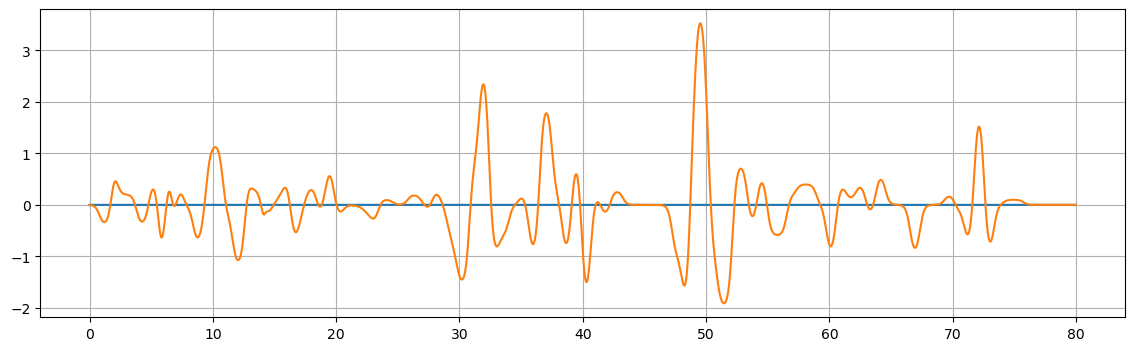

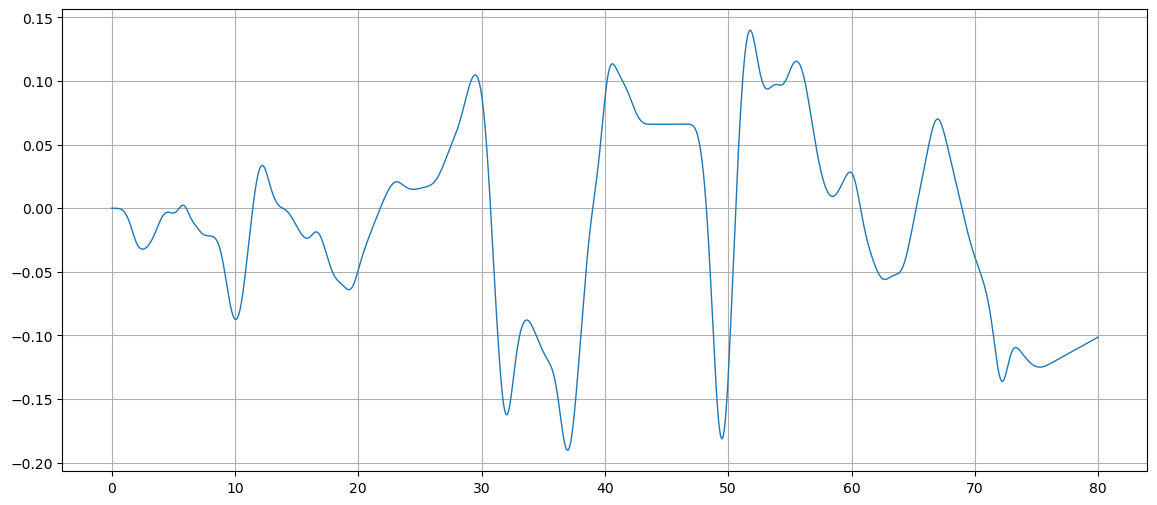

'plt.figure(figsize=(14, 4))\nplt.plot(t, ds);plt.plot(t, d2s);plt.grid()\nplt.show()'

In [6]:
dt = 0.01
size = 100 * 0.8
t = np.arange(0, size, dt)
div = 2 * 0.8

fg = np.array([
    [0, 0, 4],[-2, 4, 1],[4.4, 5, 1],[1, 2, 1],[-2, 8, 1],[2, 5, 1],[-10, 4, 1],[20, 4, 0.5],[3, 1, 1],[0, 5, 1],[-4, 4, 1],[6, 5, 0.8], #10s
    [-1, 7, 1],[-6, 4, 1],[3, 5, 1],[1.5, 2, 1],[-3, 5, 1],[-1, 1, 2],[0, 3, 1],[4.1, 5, 0.5],[0, 2, 1],[-4, 1, 1],
    [2, 4, 0.6],[-1, 6, 1],[1, 3, 1],[4, 1, 1],[-1, 3, 1],[0, 4, 1],[-2, 10, 0.5],[0.5, 4, 1],[0, 6, 1],[1, 6, 1],
    [-0.5, 6, 0.8],[1.7, 4, 1],[-5, 6, 0.5],[-8, 4, 1],[4, 5, 1],[14, 4, 1],[-5, 4, 1],[-3, 4, 1],[0, 4, 1],[1, 4, 1],
    [-5, 4, 1],[10, 4.5, 1],[1, 5, 1],[-5, 4, 1],[5, 4, 1],[-10, 4, 1],[1, 3.7, 1],[-1, 4, 1],[1.4, 4, 1],[0, 5, 1],
    [-5, 20, 1],[-10, 4, 1],[10, 3.5, 1],[20, 2, 1],[-6, 5, 0.8],[-10, 4, 1],[4, 6, 1],[-2, 6, 1],[3, 4, 1],[-3, 4, 1],
    [1, 8, 1],[2, 4, 1],[0, 8, 1],[-5, 4, 1],[2, 4, 1],[0.5, 4, 1],[2, 4, 1],[-1, 4, 1],[3, 4, 1],[0, 4, 1],[-5, 10, 1],
    [0, 4, 1],[1, 10, 1],[-0.5, 4, 1],[-4, 4, 1],[10, 4, 1],[-5, 4, 1],[0.1, 4, 1],[0.5, 4, 1]
])
#fg[:, 0] = -fg[:, 0]
re = int(size//div+40)
l = np.zeros(re) 
intev = np.ones(re) * div
l[:fg.shape[0]] = fg[:, 0] * 0.2
mag = l * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1] / 5

vel = np.ones(re);vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy();coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
ref = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i] 
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*6*(t - delay)))

p = 1000 * 8
plt.figure(figsize=(14, 4))
plt.plot(t[:p], np.zeros(p));plt.plot(t[:p], stairs_array[:p] / (np.pi/180) )
plt.grid();plt.show()

u = stairs_array.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    d2s[i] = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    ds[i] = ds[i-1] + d2s[i] * dt
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)

plt.figure(figsize=(14, 6))
plt.plot(t[:p], s[:p], linewidth=1);plt.grid()
plt.show()
ww = ds.copy()
'''plt.figure(figsize=(14, 4))
plt.plot(t, ds);plt.plot(t, d2s);plt.grid()
plt.show()'''


In [10]:
#print(stairs_array.shape)
#print(t[::10])

#data = np.vstack((stairs_array[::10], s[::10], t[::10])).T
data = np.vstack((stairs_array[::1], s[::1], t[::1])).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeam_Est.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")

(8000,) (8000,) (8000, 3)


### validation

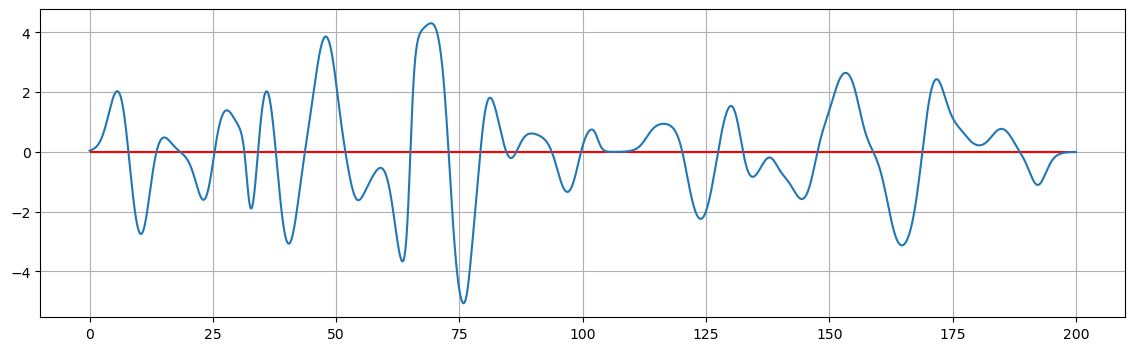

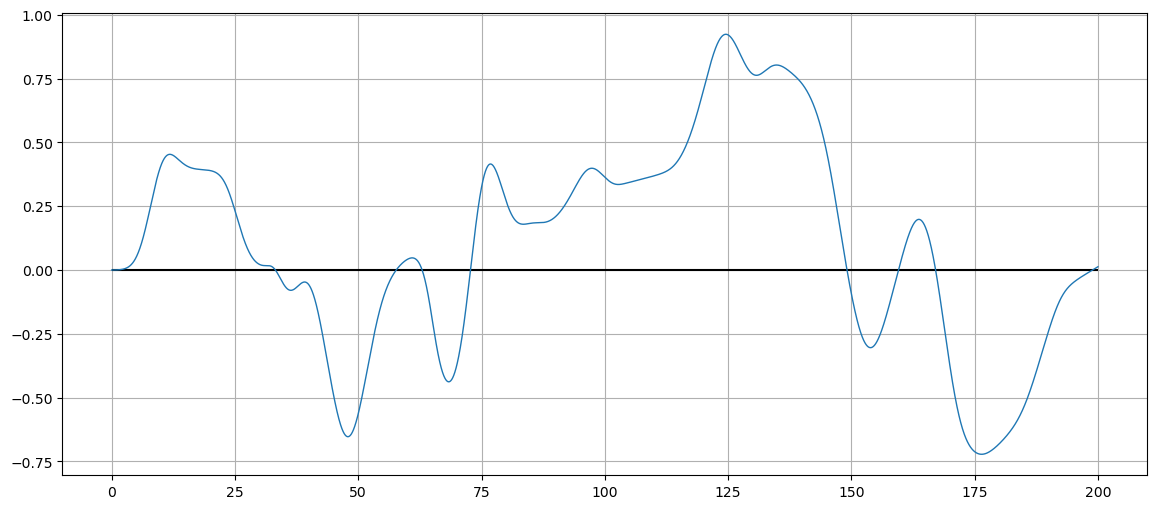

In [7]:
dt = 0.01
size = 100 * 2
t = np.arange(0, size, dt)
div = 2.5 * 1

fg = np.array([
    [0, 0, 4],[3, 4, 1],[5, 2, 1],[-5, 2, 0.8],[1, 4, 1],[0, 4, 1],[-3, 6, 1],[2, 3, 1],[0.5, 4, 1],[-5, 3, 2],[5, 2, 1],[-6, 4, 0.8],
    [1, 4, 0.8],[5, 4, 1],[0, 4, 1],[-3, 3, 1],[-1, 2, 1],[0, 3, 1],[-5, 4, 1],[4, 3, 2],[5, 4, 1],[-6, 4, 1],[-4, 4, 2],[5, 2, 1],
    [-3, 4, 0.5],[-1, 3, 1],[0.5, 1, 1],[-2, 8, 1],[1, 4, 1],[0, 4, 2],[1, 10, 1],[-2, 8, 1],[-4, 2, 0.8],[3, 4, 0.6],[-2, 5, 1],
    [2, 5, 0.5],[-0.5, 2, 1],[-2, 4, 1],[1, 4, 1],[3, 4, 1],[0, 5, 1],[-5, 6, 0.8],[-3, 2, 0.4],[4, 5, 0.8],[0.8, 4, 0.9],[0.1, 5, 1],
    [1, 5, 1],[0, 4, 1],[-2, 4, 1]
])
#fg[:, 0] = -fg[:, 0]3
re = int(size//div + 10)
u = np.zeros(re) 
intev = np.ones(re) * div
u[:fg.shape[0]] = fg[:, 0]
mag = u * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

vel = np.ones(re)
vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*(t - delay)))
    

plt.figure(figsize=(14, 4))
plt.hlines(0, 0, size, colors=["red"])
plt.plot(t, stairs_array / (np.pi/180))
plt.grid()
plt.show()


u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape)
ds = np.zeros(t.shape)
d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    d2s[i] = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    ds[i] = ds[i-1] + d2s[i] * dt
    s[i] = np.clip(s[i-1] + ds[i] * dt, -10, 10)

plt.figure(figsize=(14, 6))
plt.hlines(0, 0, size, colors=["black"])
plt.plot(t, s*0.1, linewidth=1)
plt.grid()
plt.show()


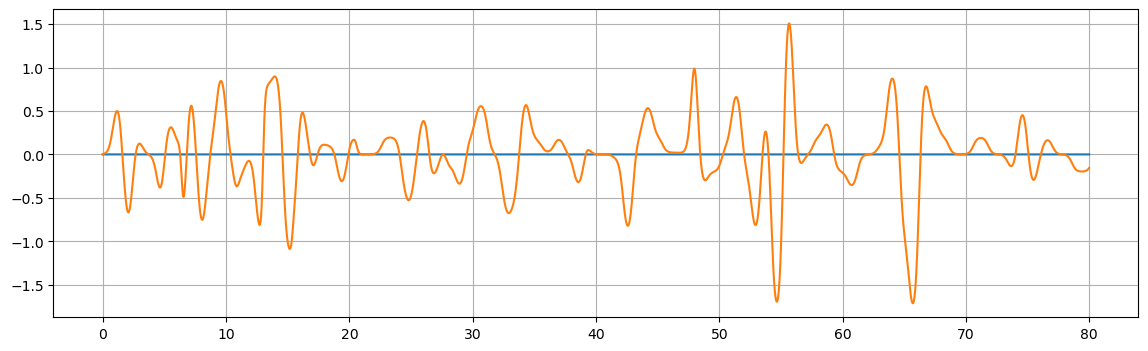

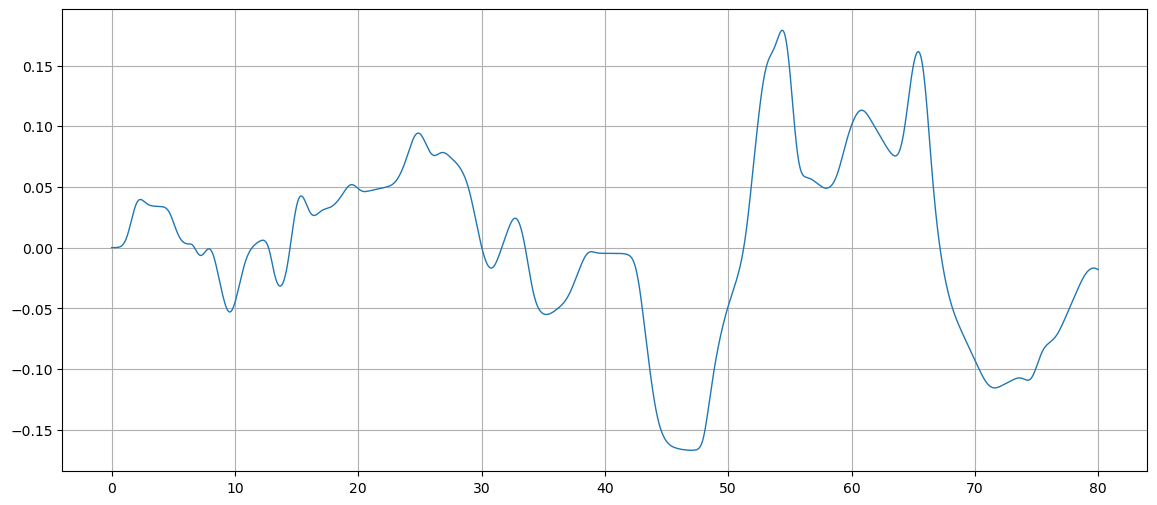

In [85]:
dt = 0.01
size = 100 * 0.8
t = np.arange(0, size, dt)
div = 2 * 0.8

fg = np.array([
    [0, 0, 4],[3, 4, 1],[5, 2, 1],[-5, 2, 0.8],[1, 4, 1],[0, 4, 1],[-3, 6, 1],[2, 3, 1],[0.5, 4, 1],[-5, 3, 2],[5, 2, 1],[-6, 4, 0.8],
    [1, 4, 0.8],[5, 4, 1],[0, 4, 1],[-3, 3, 1],[-1, 2, 1],[0, 3, 1],[-5, 4, 1],[4, 3, 2],[5, 4, 1],[-6, 4, 1],[-4, 4, 2],[5, 2, 1],
    [-3, 4, 0.5],[-1, 3, 1],[0.5, 1, 1],[-2, 8, 1],[1, 4, 1],[0, 4, 2],[1, 10, 1],[-2, 8, 1],[-4, 2, 0.8],[3, 4, 0.6],[-2, 5, 1],
    [2, 5, 0.5],[-0.5, 2, 1],[-2, 4, 1],[1, 4, 1],[3, 4, 1],[0, 5, 1],[-5, 6, 0.8],[-3, 2, 0.4],[4, 5, 0.8],[0.8, 4, 0.9],[0.1, 5, 1],
    [1, 5, 1],[0, 4, 1],[-2, 4, 1],[1, 4, 1],[0, 2, 1],[-0.2, 10, 1],[-5, 4, 1],[1, 4, 1],[3, 4, 1],[1, 4, 1],[0.1, 4, 1],[0, 8, 1],
    [10, 4, 1],[-2, 2, 1],[-1, 4, 1],[0.5, 6, 1],[4, 4, 1],[-1, 4, 1],[-5, 4, 1],[3, 4, 1],[-10, 4, 1],[10, 5, 1],[-1, 4, 1],[0, 4, 1],
    [1, 4, 1],[2, 4, 1],[-1, 4, 1],[-2, 6, 1],[0, 4, 1],[0.5, 8, 1],[5, 4, 1],[-5, 5, 1],[-10, 4, 1],[5, 4, 1],[2, 4, 1],[1, 4, 1],
    [0, 4, 1],[1, 10, 1],[0, 6, 1],[-1, 8, 1],[3, 4, 1],[-2, 4, 1],[0, 4, 1],[1, 2, 1],[0, 4, 1],[-1, 8, 1]
])

re = int(size//div+50)
l = np.zeros(re) 
intev = np.ones(re) * div
l[:fg.shape[0]] = fg[:, 0] * 0.2
mag = l * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1] / 5

vel = np.ones(re);vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy();coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
ref = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i] 
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*6*(t - delay)))

p = 1000 * 8
plt.figure(figsize=(14, 4))
plt.plot(t[:p], np.zeros(p));plt.plot(t[:p], stairs_array[:p] / (np.pi/180) )
plt.grid();plt.show()

u = stairs_array.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    d2s[i] = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    ds[i] = ds[i-1] + d2s[i] * dt
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)

plt.figure(figsize=(14, 6))
plt.plot(t[:p], s[:p], linewidth=1);plt.grid()
plt.show()


In [86]:
#print(stairs_array.shape)
#print(t[::10])
step = 1
#data = np.vstack((stairs_array[::10], s[::10], t[::10])).T
#data = np.vstack((stairs_array, s, t)).T
data = np.vstack((stairs_array[::step], s[::step], t[::step])).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeam_Val.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")

(8000,) (8000,) (8000, 3)


### Friction

In [ ]:
dt = 0.01
size = 100 * 2
t = np.arange(0, size, dt)
div = 2.5 * 2

fg = np.array([
    [0, 0, 1],[-3, 3, 2],[-2, 3, 2],[5, 1, 1],[-6, 4, 1],[-5, 2, 1],[5, 6, 1],[-2, 4, 1],[1, 8, 2],[0, 2, 1],
    [-6, 5, 1],[0, 5, 1],[4, 5, 1],[-2, 2, 1],[-10, 4, 1],[5, 2, 1],[0, 1, 1],[-3, 1, 1],[-2, 1, 0.5],[4, 1, 1],
    [-3, 4, 1],[1, 4, 1],[0, 2, 1],[-3, 4, 1],[-6, 2, 1],[1, 4, 1],[4, 3, 1],[-3, 4, 1],[-3, 4, 1],[-1, 3, 1],
    [0, 2, 1],[-3, 2, 1],[0, 6, 1],[-3, 15, 1],[0.5, 3, 1],[0, 5, 1],[0.1, 2, 1],[-4, 2, 1],[2, 3, 1],[-1, 6, 1],
    [-3, 3, 1],[0, 4, 1],[-2, 4, 1],[-0.5, 2, 1],[1.2, 2, 1],[-3, 4, 1],[-2, 4, 1],[0, 4, 1],[1, 2, 1],[-2, 4, 1],
    [0, 3, 1],[-4, 15, 1],[1, 3, 1]

])
fg[:, 0] = -fg[:, 0]
re = int(size//div + 20)
u = np.zeros(re) 
intev = np.ones(re) * div
u[:fg.shape[0]] = fg[:, 0]
mag = u * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1]

vel = np.ones(re)
vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy()
coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i]
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*(t - delay)))
    

plt.figure(figsize=(14, 4))
plt.hlines(0, 0, size, colors=["red"])
plt.plot(t, stairs_array / (np.pi / 180))
plt.grid()
plt.show()

u = stairs_array.copy()
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape)
ds = np.zeros(t.shape)
d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    d2s[i] = a3 * np.sin(u[i-1]) - fb * m * g * np.cos(u[i-1]) * ds[i-1] * np.tanh(ds[i-1] / vt) / a
    #d2s[i] = a1 * d2u[i-1] + a2 * d2u[i-1] + a3 * np.sin(u[i]) + a4 * du[i-1]**2 * s[i-1]
    ds[i] = ds[i-1] + d2s[i] * dt
    s[i] = np.clip(s[i-1] + ds[i] * dt, -10, 10)

plt.figure(figsize=(14, 4))
plt.plot(t, s)
plt.grid()
plt.show()


In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(t, a3 * np.sin(u) - fb * m * g * np.cos(u) * ds * np.tanh(ds / vt) / a)
plt.plot(t, a3 * np.sin(u))
plt.plot(t, fb * m * g * np.cos(u) * ds * np.tanh(ds / vt) / a)
plt.grid()
plt.show()

In [ ]:
data = np.vstack((stairs_array[::10], s[::10], t[::10])).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeamFriction2?.csv", data, delimiter=",", fmt="%.6f", header="input,output,time", comments="")

# Runge Kutta

## Estimação

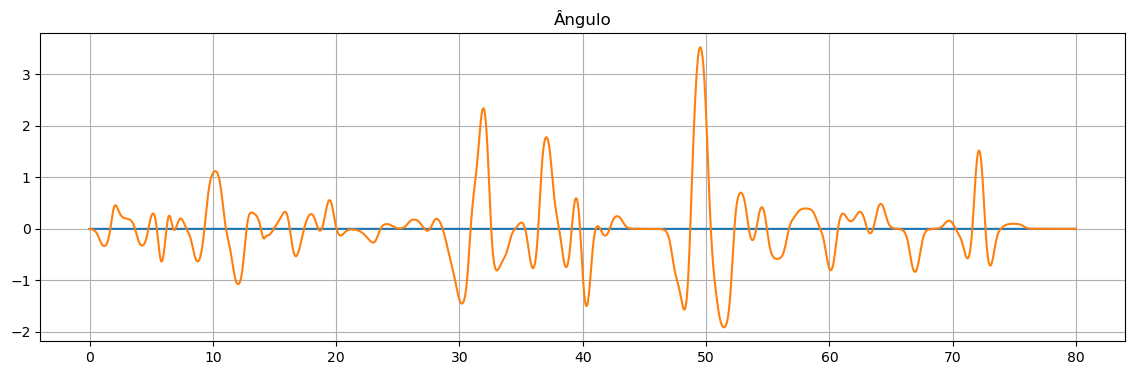

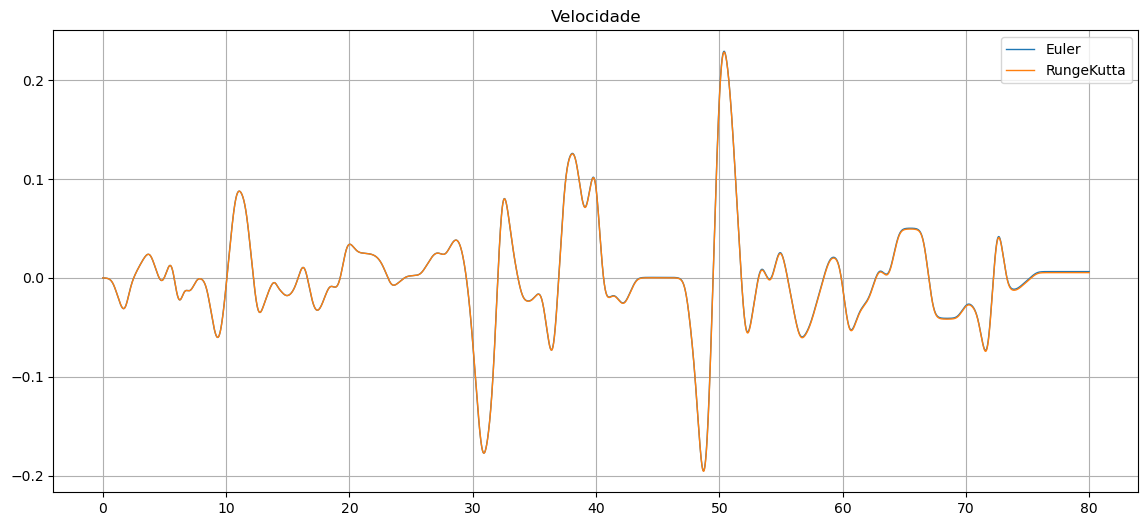

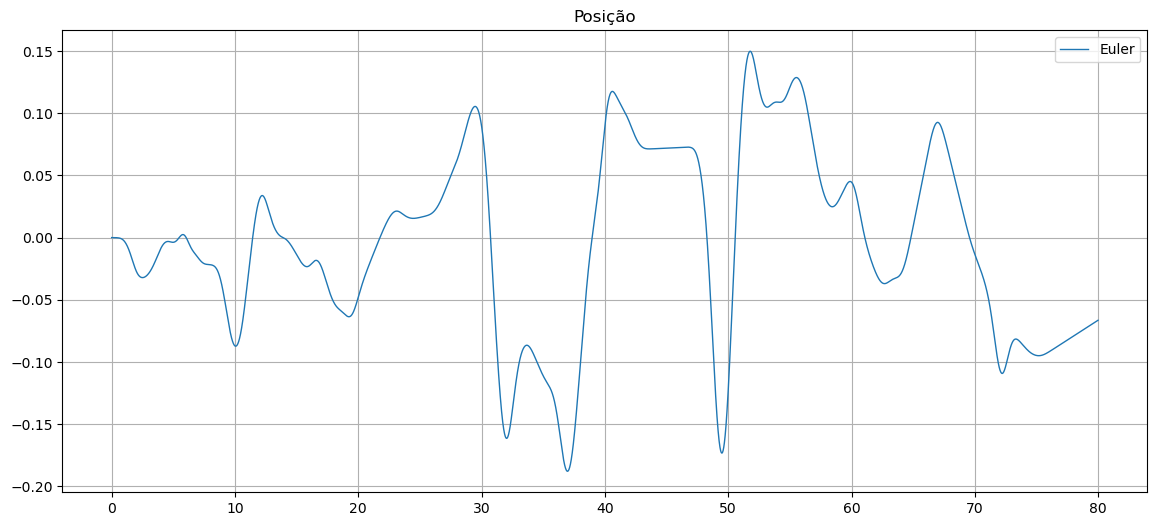

In [27]:
dt = 0.01
size = 100 * 0.8
t = np.arange(0, size, dt)
div = 2 * 0.8

fg = np.array([
    [0, 0, 4],[-2, 4, 1],[4.4, 5, 1],[1, 2, 1],[-2, 8, 1],[2, 5, 1],[-10, 4, 1],[20, 4, 0.5],[3, 1, 1],[0, 5, 1],[-4, 4, 1],[6, 5, 0.8], #10s
    [-1, 7, 1],[-6, 4, 1],[3, 5, 1],[1.5, 2, 1],[-3, 5, 1],[-1, 1, 2],[0, 3, 1],[4.1, 5, 0.5],[0, 2, 1],[-4, 1, 1],
    [2, 4, 0.6],[-1, 6, 1],[1, 3, 1],[4, 1, 1],[-1, 3, 1],[0, 4, 1],[-2, 10, 0.5],[0.5, 4, 1],[0, 6, 1],[1, 6, 1],
    [-0.5, 6, 0.8],[1.7, 4, 1],[-5, 6, 0.5],[-8, 4, 1],[4, 5, 1],[14, 4, 1],[-5, 4, 1],[-3, 4, 1],[0, 4, 1],[1, 4, 1],
    [-5, 4, 1],[10, 4.5, 1],[1, 5, 1],[-5, 4, 1],[5, 4, 1],[-10, 4, 1],[1, 3.7, 1],[-1, 4, 1],[1.4, 4, 1],[0, 5, 1],
    [-5, 20, 1],[-10, 4, 1],[10, 3.5, 1],[20, 2, 1],[-6, 5, 0.8],[-10, 4, 1],[4, 6, 1],[-2, 6, 1],[3, 4, 1],[-3, 4, 1],
    [1, 8, 1],[2, 4, 1],[0, 8, 1],[-5, 4, 1],[2, 4, 1],[0.5, 4, 1],[2, 4, 1],[-1, 4, 1],[3, 4, 1],[0, 4, 1],[-5, 10, 1],
    [0, 4, 1],[1, 10, 1],[-0.5, 4, 1],[-4, 4, 1],[10, 4, 1],[-5, 4, 1],[0.1, 4, 1],[0.5, 4, 1]
])
#fg[:, 0] = -fg[:, 0]
re = int(size//div+40)
l = np.zeros(re) 
intev = np.ones(re) * div
l[:fg.shape[0]] = fg[:, 0] * 0.2
mag = l * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1] / 5

vel = np.ones(re);vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy();coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
ref = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i] 
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*6*(t - delay)))

p = 1000 * 8
plt.figure(figsize=(14, 4))
plt.title("Ângulo")
plt.plot(t[:p], np.zeros(p));plt.plot(t[:p], stairs_array[:p] / (np.pi/180) )
plt.grid();plt.show()

u = stairs_array.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    um = (u[i-1] + u[i]) / 2
    dum = (um - u[i-1]) / dt
    k1 = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    k2 = m * (s[i-1] + (dt/2) * k1) * (dum**2) / a + m * g * np.sin(um) / a
    k3 = m * (s[i-1] + (dt/2) * k2) * (dum**2) / a + m * g * np.sin(um) / a
    k4 = m * (s[i-1] + dt * k3) * (du[i]**2) / a + m * g * np.sin(u[i]) / a

    ds[i] = ds[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)

plt.figure(figsize=(14, 6))
plt.title("Velocidade")
plt.plot(t[:p], ds[:p], linewidth=1, label="Euler")
plt.plot(t[:p], ww[:p], linewidth=1, label="RungeKutta")
plt.legend();plt.grid();plt.show()

plt.figure(figsize=(14, 6))
plt.title("Posição")
plt.plot(t[:p], s[:p], linewidth=1, label="Euler")
#plt.plot(t[:p], ww[:p], linewidth=1, label="RungeKutta")
plt.legend();plt.grid();plt.show()


In [30]:

data = np.vstack((stairs_array[::1], s[::1], ds[::1], t[::1])).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/ballBeamRungeKutta_Est.csv", data, delimiter=",", fmt="%.6f", header="input,output,derivada,time", comments="")

(8000,) (8000,) (8000, 4)


## Validação

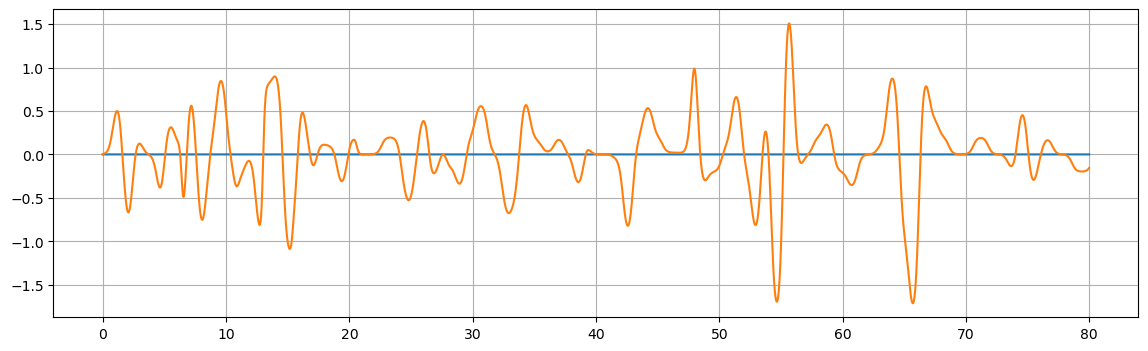

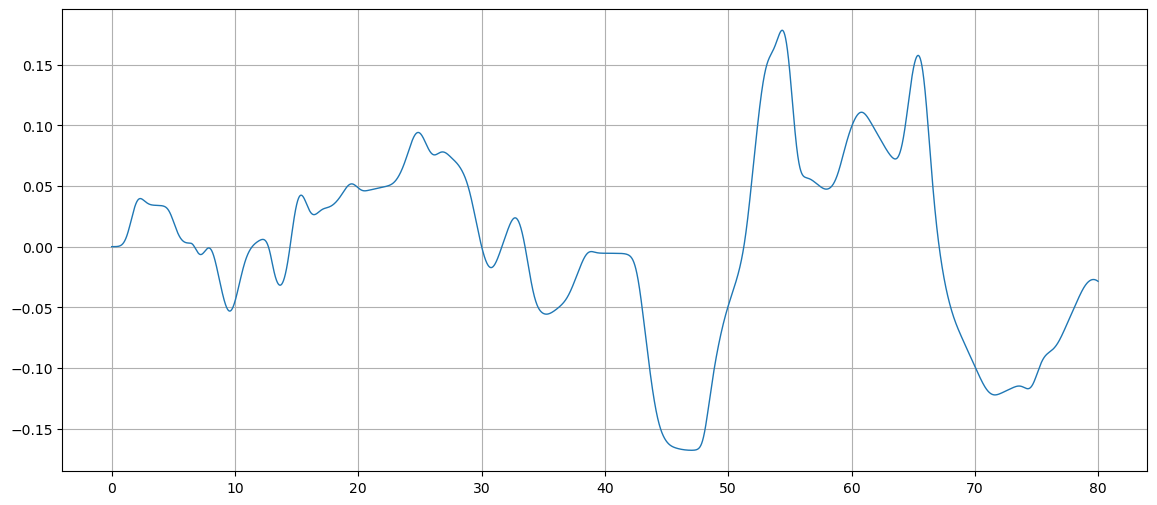

In [5]:
dt = 0.01
size = 100 * 0.8
t = np.arange(0, size, dt)
div = 2 * 0.8

fg = np.array([
    [0, 0, 4],[3, 4, 1],[5, 2, 1],[-5, 2, 0.8],[1, 4, 1],[0, 4, 1],[-3, 6, 1],[2, 3, 1],[0.5, 4, 1],[-5, 3, 2],[5, 2, 1],[-6, 4, 0.8],
    [1, 4, 0.8],[5, 4, 1],[0, 4, 1],[-3, 3, 1],[-1, 2, 1],[0, 3, 1],[-5, 4, 1],[4, 3, 2],[5, 4, 1],[-6, 4, 1],[-4, 4, 2],[5, 2, 1],
    [-3, 4, 0.5],[-1, 3, 1],[0.5, 1, 1],[-2, 8, 1],[1, 4, 1],[0, 4, 2],[1, 10, 1],[-2, 8, 1],[-4, 2, 0.8],[3, 4, 0.6],[-2, 5, 1],
    [2, 5, 0.5],[-0.5, 2, 1],[-2, 4, 1],[1, 4, 1],[3, 4, 1],[0, 5, 1],[-5, 6, 0.8],[-3, 2, 0.4],[4, 5, 0.8],[0.8, 4, 0.9],[0.1, 5, 1],
    [1, 5, 1],[0, 4, 1],[-2, 4, 1],[1, 4, 1],[0, 2, 1],[-0.2, 10, 1],[-5, 4, 1],[1, 4, 1],[3, 4, 1],[1, 4, 1],[0.1, 4, 1],[0, 8, 1],
    [10, 4, 1],[-2, 2, 1],[-1, 4, 1],[0.5, 6, 1],[4, 4, 1],[-1, 4, 1],[-5, 4, 1],[3, 4, 1],[-10, 4, 1],[10, 5, 1],[-1, 4, 1],[0, 4, 1],
    [1, 4, 1],[2, 4, 1],[-1, 4, 1],[-2, 6, 1],[0, 4, 1],[0.5, 8, 1],[5, 4, 1],[-5, 5, 1],[-10, 4, 1],[5, 4, 1],[2, 4, 1],[1, 4, 1],
    [0, 4, 1],[1, 10, 1],[0, 6, 1],[-1, 8, 1],[3, 4, 1],[-2, 4, 1],[0, 4, 1],[1, 2, 1],[0, 4, 1],[-1, 8, 1]
])

re = int(size//div+50)
l = np.zeros(re) 
intev = np.ones(re) * div
l[:fg.shape[0]] = fg[:, 0] * 0.2
mag = l * (np.pi / 180)
intev[:fg.shape[0]] = fg[:, 1] / 5

vel = np.ones(re);vel[:fg.shape[0]] = fg[:, 2]

coeff = mag.copy();coeff[1:] = mag[1:] - mag[:-1]

delay = 0
stairs_array = np.zeros(t.shape, np.float64)
ref = np.zeros(t.shape, np.float64)
for i in range(0, mag.shape[0]):
    delay = delay + intev[i] 
    stairs_array = stairs_array + coeff[i] * 1./(1 + np.exp(-vel[i]*6*(t - delay)))

p = 1000 * 8
plt.figure(figsize=(14, 4))
plt.plot(t[:p], np.zeros(p));plt.plot(t[:p], stairs_array[:p] / (np.pi/180) )
plt.grid();plt.show()

u = stairs_array.copy();du = np.zeros(t.shape);d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt;d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape);ds = np.zeros(t.shape);d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    um = (u[i-1] + u[i]) / 2
    dum = (um - u[i-1]) / dt
    k1 = m * s[i-1] * (du[i-1]**2) / a + m * g * np.sin(u[i-1]) / a
    k2 = m * (s[i-1] + (dt/2) * k1) * (dum**2) / a + m * g * np.sin(um) / a
    k3 = m * (s[i-1] + (dt/2) * k2) * (dum**2) / a + m * g * np.sin(um) / a
    k4 = m * (s[i-1] + dt * k3) * (du[i]**2) / a + m * g * np.sin(u[i]) / a

    ds[i] = ds[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    s[i] = np.clip(s[i-1] + ds[i] * dt, -0.2, 0.20)

plt.figure(figsize=(14, 6))
plt.plot(t[:p], s[:p], linewidth=1);plt.grid()
plt.show()


In [6]:

data = np.vstack((stairs_array[::1], s[::1], ds[::1], t[::1])).T
print(stairs_array.shape, s.shape, data.shape)
np.savetxt("data/BBRungeKutta_Val.csv", data, delimiter=",", fmt="%.6f", header="input,output,derivada,time", comments="")

(8000,) (8000,) (8000, 4)


# BallBeam Data

In [ ]:
ballbeam  = np.loadtxt('data/ballbeam.dat')
print(ballbeam.shape)
part = 500#ballbeam.shape[0] // 2#700

uballbeam = ballbeam[:part, 0].reshape((1,-1))
yballbeam = ballbeam[:part, 1].reshape((1,-1))

wn = 0.2
B1, A1 = signal.butter(4, wn, 'low')
ufiltered = signal.filtfilt(B1, A1, uballbeam, padlen=100)

t = np.arange(0, 50, 0.1)

plt.figure(figsize=(15,4))
plt.title("Ball and beam")
plt.plot(t, ufiltered.T, label='Original')
plt.plot(t, yballbeam.T, label='Original')
plt.legend()
plt.show()

In [ ]:
dt = 0.1

u = (ufiltered.T)[:, 0]
du = np.zeros(t.shape)
d2u = np.zeros(t.shape)

du[1:] = (u[1:] - u[:-1]) / dt
d2u[2:] = (du[2:] - du[1:-1]) / dt

s = np.zeros(t.shape)
ds = np.zeros(t.shape)
d2s = np.zeros(t.shape)

for i in range(1, t.shape[0]):
    d2s[i] = a3 * np.sin(u[i-1]) - fb * m * g * np.cos(u[i-1]) * ds[i-1] * np.tanh(ds[i-1] / vt) / a
    #d2s[i] = a1 * d2u[i-1] + a2 * d2u[i-1] + a3 * np.sin(u[i]) + a4 * du[i-1]**2 * s[i-1]
    ds[i] = ds[i-1] + d2s[i] * dt
    s[i] = np.clip(s[i-1] + ds[i] * dt, -10, 10)

plt.figure(figsize=(14, 4))
plt.plot(t, s)
plt.plot(t, u*100)
plt.grid()
plt.show()


In [ ]:
u.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definição dos parâmetros do sistema de segunda ordem superamortecido
omega_n = 6  # Frequência natural
zeta = 0.9   # Razão de amortecimento (superamortecido, zeta > 1)

# Definição da função de transferência do sistema
numerator = [omega_n**2]
denominator = [1, 2*zeta*omega_n, omega_n**2]


# Criação do sistema de segunda ordem superamortecido
system = signal.TransferFunction(numerator, denominator)

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Entrada de pulsos quadrados
frequency = 0.8  # Frequência dos pulsos quadrados em Hz
u = signal.square(2 * np.pi * frequency * t)
u[500:] *= 8
u[800:] = 8

# Definição do filtro de média móvel
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    window *= 2
    window[:window_size//2] = 0
    return np.convolve(signal, window, mode='same')

# Aplicação do filtro de média móvel à entrada de pulsos quadrados
window_size = 50  # Defina o tamanho da janela
u_smoothed = moving_average(u, window_size)

# Simulação da resposta do sistema ao sinal de entrada suavizado
t_out, y_out, _ = signal.lsim(system, U=u, T=t)

# Plotagem dos resultados
plt.figure(figsize=(14, 6))
plt.plot(t, u, label='Entrada (Pulsos Quadrados)')
plt.plot(t, u_smoothed, label='Entrada Suavizada (Média Móvel)')
plt.plot(t_out, y_out, label='Resposta do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta de um Sistema de Segunda Ordem Superamortecido a Pulsos Quadrados com Filtro de Média Móvel')
plt.grid()
plt.legend()
plt.show()
